In [1]:
# 데이터 적재
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [2]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
# 훈련, 검증, 테스트 세트로 분리 후 X_train, X_valid, X_test를 스케일링
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [4]:
print(X_train.shape)
print(y_train.shape)

(11610, 8)
(11610,)


In [5]:
print(y_train[0])

1.442


In [6]:
# Sequential로 회귀용 MLP구축
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9112 - val_loss: 0.9947
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6781 - val_loss: 0.6342
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5914 - val_loss: 0.5700
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 0.5483
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5269 - val_loss: 0.5113
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5075 - val_loss: 0.4917
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4923 - val_loss: 0.4733
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4804 - val_loss: 0.4647
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.4591
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4623 - val_loss: 0.4603

In [ ]:
print(X_new)
print(y_pred)

[[-1.15780104 -0.28673138 -0.49550877 -0.16618097 -0.02946012  0.38899735
   0.19374821  0.2870474 ]
 [-0.7125531   0.10880952 -0.16332973  0.20164652  0.12842117 -0.11818174
  -0.23725261  0.06215231]
 [-0.2156101   1.8491895  -0.57982788  0.18528489 -0.10429403 -0.67694905
   1.00890193 -1.4271529 ]]
[[0.67356515]
 [1.7514434 ]
 [3.2646484 ]]


In [ ]:
import matplotlib.pyplot as plt

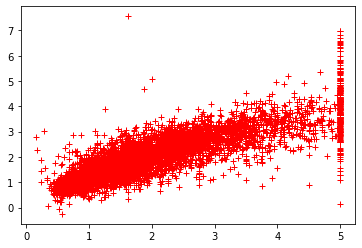

In [ ]:
y_pred = model.predict(X_test)
plt.plot(y_test,y_pred, 'r+')
#plt.plot(y_test,y_pred, ',')

In [ ]:
y_pred

array([[0.6735651],
       [1.7514434],
       [3.2646484],
       ...,
       [1.2126617],
       [2.2914865],
       [3.8180094]], dtype=float32)

In [ ]:
# 함수형 API활용
# Wide & Deep 신경망

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 2.2527 - val_loss: 3.8965
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6711 - val_loss: 1.7725
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6131 - val_loss: 1.0568
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5738 - val_loss: 0.5404
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5485 - val_loss: 0.5457
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5295 - val_loss: 0.5068
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5100 - val_loss: 0.4718
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4844
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4848 - val_loss: 0.7037
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4741 - val_loss: 0.4350

In [ ]:
# 와이드나 딥 경로에 다른 특성 입력

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.0804 - val_loss: 2.8513
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7275 - val_loss: 0.6342
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6110 - val_loss: 0.6554
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5705 - val_loss: 0.6180
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5422 - val_loss: 0.5273
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5210 - val_loss: 0.4983
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5024 - val_loss: 0.5574
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.4890
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4753 - val_loss: 0.4465
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4657 - val_loss: 0.4643

In [ ]:
# 여러 개의 출력이 필요한 경우

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])


In [ ]:
# 컴파일 및 훈련
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 각 출력은 자신만의 손실 함수가 필요(하나를 전달하면 keras가 같은 것 사용)
# 최종 손실 : 나열된 손실들의 합
# 보조 출력보다 주 출력에 관심이 많은 경우: 주 출력의 손실에 더 많은 가중치

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
# 훈련시 각 출력에 대한 레이블을 제공
# 모델을 평가하면 개별 손실과 총 손실을 반환

# predict()는 각 출력에 대한 예측을 반환
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])


Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8818 - main_output_loss: 1.7363 - aux_output_loss: 3.1905 - val_loss: 3.1077 - val_main_output_loss: 2.1478 - val_aux_output_loss: 11.7463
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9201 - main_output_loss: 0.7857 - aux_output_loss: 2.1296 - val_loss: 1.7536 - val_main_output_loss: 0.7463 - val_aux_output_loss: 10.8191
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8062 - main_output_loss: 0.6962 - aux_output_loss: 1.7968 - val_loss: 1.5157 - val_main_output_loss: 0.6794 - val_aux_output_loss: 9.0426
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7435 - main_output_loss: 0.6457 - aux_output_loss: 1.6238 - val_loss: 1.3290 - val_main_output_loss: 0.6699 - val_aux_output_loss: 7.2602
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6996 - main_output_loss: 0.6085 - aux_output_loss: 1.5194 - val_lo